### Importing neccessary libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("E:/AI &ML_datasets/ML_Datasets/Telco Customer Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
data.shape

(7043, 21)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### checking distinct values in each columns

In [4]:
for i in data.columns:
    print(data[i].value_counts())

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

#### checking for null values

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Detecting duplicate rows

In [6]:
data.duplicated().sum()

0

#### triming the dataset

In [7]:
for i in data.columns:
    if(data[i].dtype==object):
        data[i].str.strip()

### Converting categorical into numerical columns

In [8]:
data1=data.copy()
data1["gender"].replace({"Male":1,"Female":0},inplace=True)
data1["Partner"].replace({"Yes":1,"No":0},inplace=True)
data1["Dependents"].replace({"Yes":1,"No":0},inplace=True)
data1["PhoneService"].replace({"Yes":1,"No":0},inplace=True)
data1["PaperlessBilling"].replace({"Yes":1,"No":0},inplace=True)
data1["Churn"].replace({"Yes":1,"No":0},inplace=True)
data1["OnlineSecurity"].replace({"Yes":2,"No":1,"No internet service":0},inplace=True)
data1["OnlineBackup"].replace({"Yes":2,"No":1,"No internet service":0},inplace=True)
data1["DeviceProtection"].replace({"Yes":2,"No":1,"No internet service":0},inplace=True)
data1["TechSupport"].replace({"Yes":2,"No":1,"No internet service":0},inplace=True)
data1["StreamingTV"].replace({"Yes":2,"No":1,"No internet service":0},inplace=True)
data1["StreamingMovies"].replace({"Yes":2,"No":1,"No internet service":0},inplace=True)
data1["Contract"].replace({"Two year":2,"One year":1,"Month-to-month":0},inplace=True)
data1["MultipleLines"].replace({"Yes":2,"No":1,"No phone service":0},inplace=True)
data1["InternetService"].replace({"Fiber optic":2,"DSL":1,"No":0},inplace=True)
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,1,...,1,1,1,1,0,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,1,1,2,...,2,1,1,1,1,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,1,1,2,...,1,1,1,1,0,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,2,...,2,2,1,1,1,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,1,2,1,...,1,1,1,1,0,1,Electronic check,70.70,151.65,1


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [10]:
data1["TotalCharges"].replace({" ":0},inplace=True)#488

In [11]:
data1["TotalCharges"]=pd.to_numeric(data1["TotalCharges"]).astype(float)

In [12]:
data1["TotalCharges"].replace({0:data1["TotalCharges"].mean()},inplace=True)

# EDA Analysis

### Corelation Matrix

<AxesSubplot:>

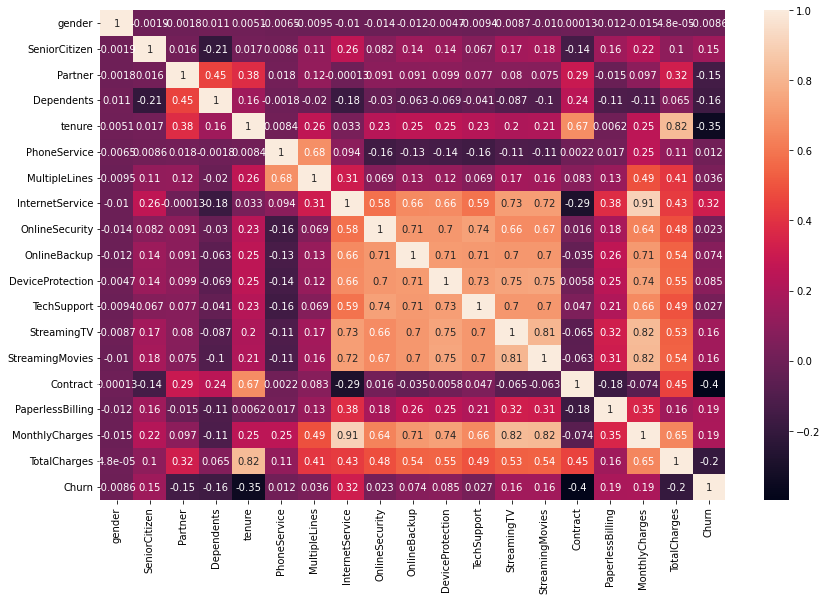

In [13]:
plt.figure(figsize=(14,9))
sns.heatmap(data1.corr(),annot=True)

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure'>

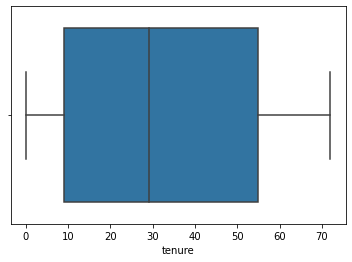

In [14]:
sns.boxplot(data1["tenure"])

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

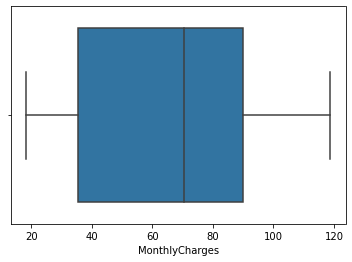

In [15]:
sns.boxplot(data1["MonthlyCharges"])

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

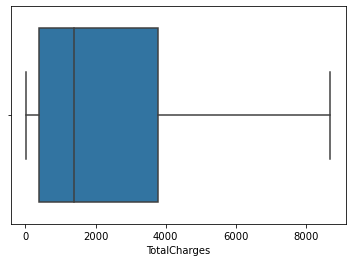

In [16]:
sns.boxplot(data1["TotalCharges"])

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

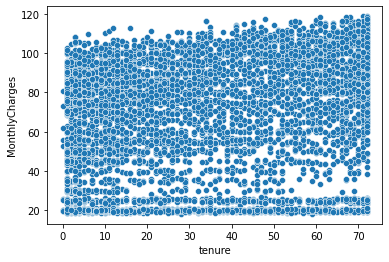

In [17]:
sns.scatterplot(data1["tenure"],data1["MonthlyCharges"])

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

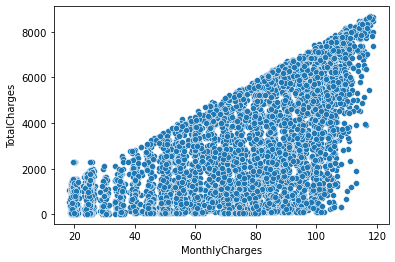

In [18]:
sns.scatterplot(data1["MonthlyCharges"],data1["TotalCharges"])

#### by observing above graphs ,NO outliers detected

### splitting data as independent and dependent futures

In [19]:
x=data1.drop(columns=["customerID"])
y=data1["Churn"]

### getting dummy variables for Payment Methods

In [20]:
dum=pd.get_dummies(x["PaymentMethod"],drop_first=True)
x1=pd.concat([x,dum],axis=1)

In [21]:
x1.drop(columns="PaymentMethod",inplace=True)

### splitting data as training and testing datasets

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=42)


# Model Building

### LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="saga")
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.7601135557132718

### SVM

In [24]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.7352732434350603

### RandomForest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rf.score(x_test,y_test)

1.0

### DecisionTree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

1.0

### KNeighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.808374733853797

### prediction

In [28]:
def attr_predict(sales,satis,eva,nump,amh,tsc,wc,prom5,salary):
    loc_index=np.where(x1.columns==sales)[0][0]
    print(loc_index)
    x=np.zeros(len(x1.columns))
    x[0]=satis
    x[1]=eva
    x[2]=nump
    x[3]=amh
    x[4]=tsc
    x[5]=wc
    x[6]=prom5
    x[7]=salary
    if loc_index >=0:
        x[loc_index]=1
    return rf.predict([x])[0]

In [29]:
data1.loc[4188]

customerID                2357-COQEK
gender                             0
SeniorCitizen                      1
Partner                            0
Dependents                         0
tenure                            28
PhoneService                       1
MultipleLines                      2
InternetService                    2
OnlineSecurity                     1
OnlineBackup                       1
DeviceProtection                   2
TechSupport                        2
StreamingTV                        2
StreamingMovies                    2
Contract                           0
PaperlessBilling                   1
PaymentMethod       Electronic check
MonthlyCharges                 103.3
TotalCharges                 2890.65
Churn                              1
Name: 4188, dtype: object

In [30]:
v=x1.loc[4188]

In [31]:
rf.predict([v])

array([1], dtype=int64)

## Atlast accuracy given by models are

### KNeighbors :80.8374733853797 %

### SVM :73.52732434350603 %

### DecisionTree :100 %

### RandomForest :100 %

### Logistic Regression:76.01135557132718 %

## Conclusion RandomForest and DecisionTree  Gives High accuracy than other models

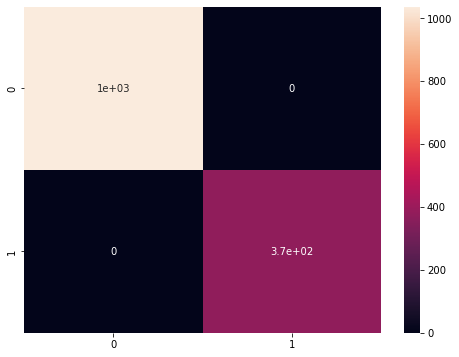

In [33]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
plt.show()